In [33]:
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
!pip install pmdarima

from pmdarima.arima import auto_arima


In [31]:
def plot(input_file, whether_plot_trend, whether_plot_acf, whether_plot_seasonal_acf, diff):
    
# read in data
    
    df = pd.read_csv(input_file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
#     print(df)

    if whether_plot_trend == True:
        plt.figure(figsize=(15,4))
        plt.plot(df.cost)
        plt.title('Project A Cost over Time') # fontsize=#
        plt.ylabel('Cost')
        for month in range(1,12):
            plt.axvline(pd.to_datetime('2022-' + str(month) + '-01'), color='k', linestyle='--', alpha=0.2) 
        n_diff = df.cost.diff()[1:]
        plt.figure(figsize=(15,4))
        plt.plot(n_diff)
        plt.title('Project A Stablized Cost over Time') # fontsize=#
        plt.ylabel('Cost')
        for month in range(1,12):
            plt.axvline(pd.to_datetime('2022-' + str(month) + '-01'), color='k', linestyle='--', alpha=0.2)             
    
    if whether_plot_acf == True:
# acf
        acf_plot = plot_acf(df.cost, lags=40)
# pacf
        pacf_plot = plot_pacf(df.cost, lags=40)

# adfuller
        adfuller_result = adfuller(df.cost)
        print('ADF Statistic: %f' % adfuller_result[0])
        print('p-value: %f' % adfuller_result[1])

      #繪製標準差
        rolling_deviations = pd.Series(dtype=float, index = df.index)
        rolling_deviations_fake = pd.Series(dtype=float, index = df.index)
        for date in rolling_deviations.index:
            #get the window ending at this data point
            window = df.loc[date - timedelta(days=5):date]


            #get the deviation within this window
            rolling_deviations[date] = window.std()
            if rolling_deviations[date] > 20:
              df.loc[date] = np.mean(df.loc[date - timedelta(days=5):date])
              print(df.loc[date])
        #get the difference in deviation between one time point and the next
        diff_rolling_deviations = rolling_deviations
        diff_rolling_deviations = diff_rolling_deviations.dropna()
        plt.figure(figsize=(10,4))
        plt.plot(diff_rolling_deviations)
        plt.title('Deviation Differences', fontsize=20)
        plt.ylabel('usage', fontsize=16)





# stablized
    n_diff = []
    # n_diff = df.cost.diff()[1:]

    for i in range(diff, len(df.cost)):
        n_diff.append(df.cost[i] - df.cost[i-30])
        
    adfuller_result = adfuller(n_diff)
    print('ADF Statistic: %f' % adfuller_result[0])
    print('p-value: %f' % adfuller_result[1])
    if whether_plot_seasonal_acf == True:
# acf after removing trend
        acf_plot = plot_acf(n_diff, lags=40)
# pacf after removing trend
        pacf_plot = plot_pacf(n_diff, lags=40)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages

ADF Statistic: -6.989692
p-value: 0.000000
cost    260.431735
Name: 2022-01-13 00:00:00, dtype: float64
cost    231.518886
Name: 2022-01-27 00:00:00, dtype: float64
cost    223.103755
Name: 2022-01-28 00:00:00, dtype: float64
cost    214.761489
Name: 2022-01-29 00:00:00, dtype: float64
cost    204.703998
Name: 2022-01-30 00:00:00, dtype: float64
cost    193.260091
Name: 2022-01-31 00:00:00, dtype: float64
cost    198.810721
Name: 2022-02-01 00:00:00, dtype: float64
cost    214.969843
Name: 2022-02-03 00:00:00, dtype: float64
cost    215.256828
Name: 2022-02-04 00:00:00, dtype: float64
cost    217.458585
Name: 2022-02-05 00:00:00, dtype: float64
cost    224.160251
Name: 2022-02-06 00:00:00, dtype: float64
cost    230.01104
Name: 2022-02-07 00:00:00, dtype: float64
cost    228.930763
Name: 2022-02-08 00:00:00, dtype: float64
cost    231.126549
Name: 2022-02-09 00:00:00, dtype: float64
cost    241.498363
Name: 2022-02-11 00:00:00, dtype: float64
cost    244.46666
Name: 2022-03-04 00:00:00

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


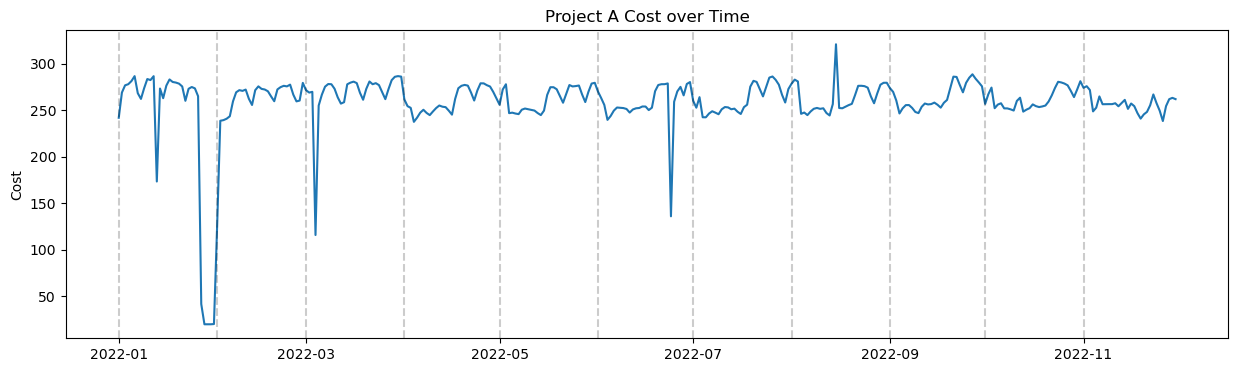

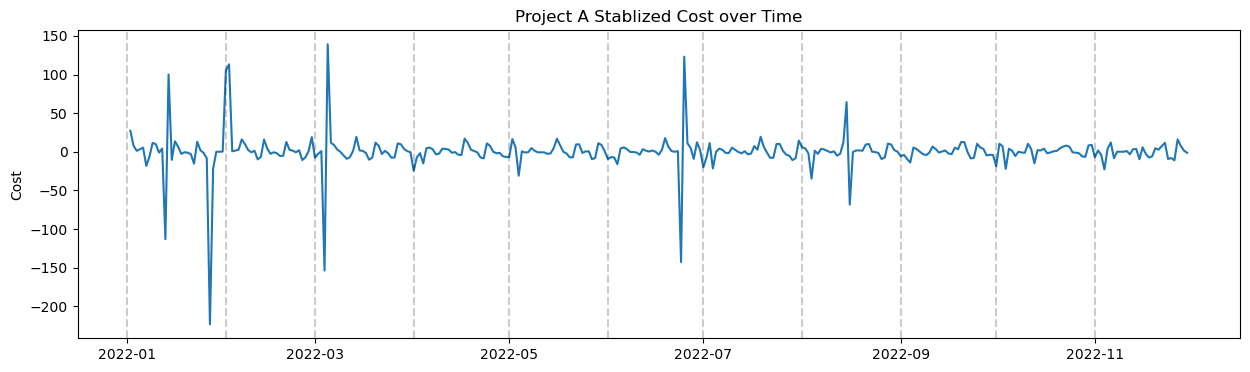

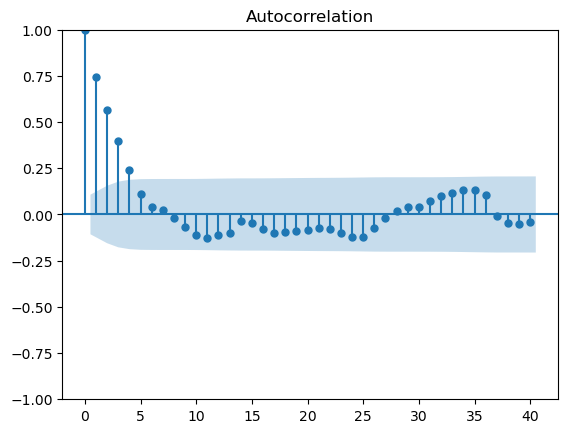

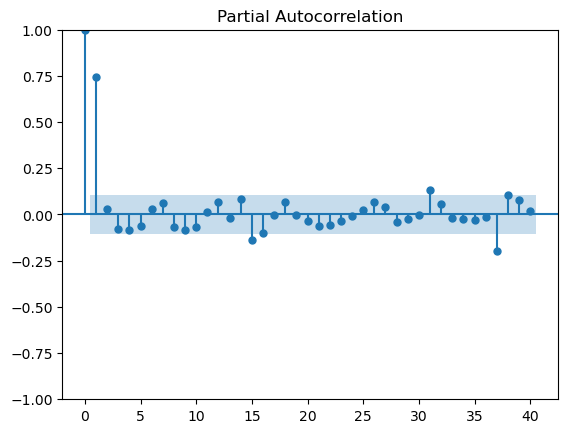

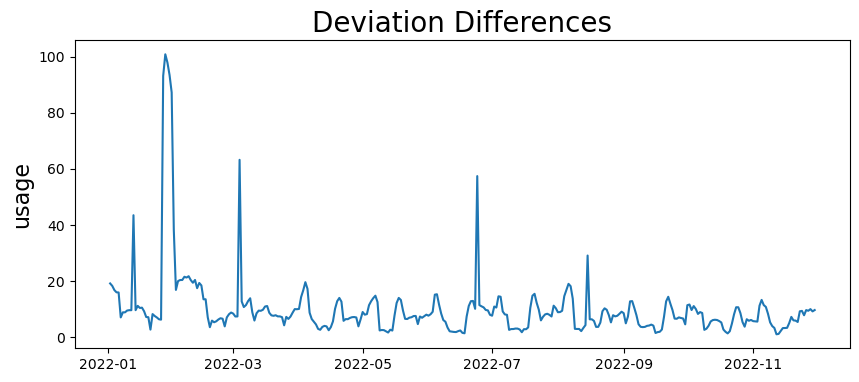

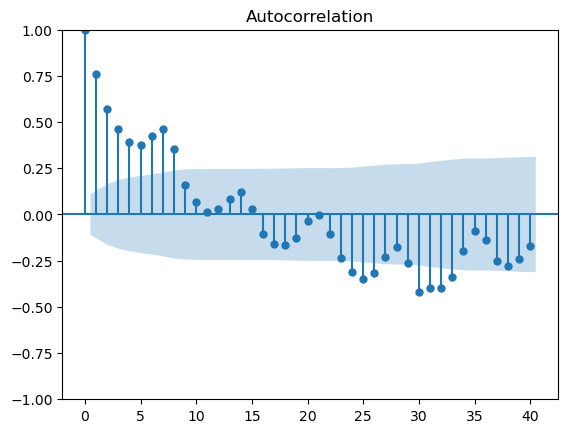

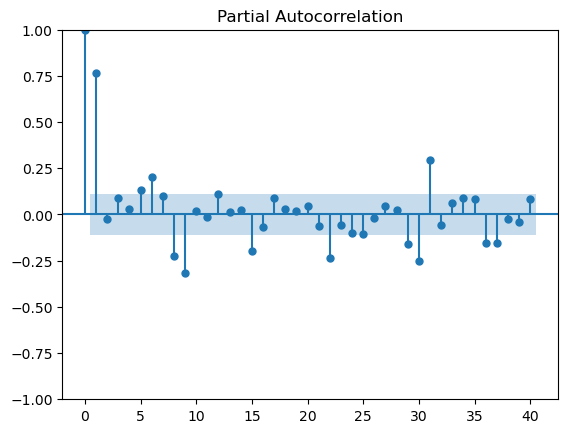

In [4]:
if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--project', default='a')
#     parser.add_argument('--plot', default=True)
#     args = parser.parse_args()
#     main(args.input)

    project = 'a'
    whether_plot_trend = True
    whether_plot_acf = True
    whether_plot_seasonal_acf = True
    whether_take_diff = True # b needs to be taken
    diff = 20
    plot('project_a.csv', whether_plot_trend, whether_plot_acf, whether_plot_seasonal_acf,diff)

In [32]:

def sarima_model(input_file, model_type, para):
    
# read in data
    
    df = pd.read_csv(input_file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df2 = df.copy()
    #print(df)
    #print(df2)

    rolling_deviations = pd.Series(dtype=float, index = df.index)
    rolling_deviations_fake = pd.Series(dtype=float, index = df.index)
    for date in rolling_deviations.index:
        #get the window ending at this data point
        window = df2.loc[date - timedelta(days=5):date]


        #get the deviation within this window
        rolling_deviations[date] = window.std()
        if rolling_deviations[date] > 10:
              df2.loc[date] = np.mean(df2.loc[date - timedelta(days=5):date])
        

# train_test_split
    train_end = datetime(2022, 11, 1)
    val_end = datetime(2022, 11, 1)
    test_end = datetime(2022, 12, 1)
    
    train_data = df2[:train_end]
    val_data = df2[train_end+timedelta(days=1):val_end]
    test_data = df[val_end+timedelta(days=1):test_end]


# construct model
    best_RMSE = 1000
    best_para = []
    if model_type == 'arima':
        model = ARIMA(train_data, order=(para[0][0], para[0][1], para[0][2]))
        model_fit = model.fit()
        # print(model_fit.summary())
        
    if model_type == 'sarima':
        model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
        model_fit = model.fit()
        # print(model_fit.summary())
        
    if model_type == 'auto_sarima':
        Arima_model=auto_arima(train_data, start_p=1, start_q=1, max_p=10, max_q=2, start_P=7, start_Q=0,max_order = 10, max_P=10, max_Q=5, m=15, seasonal=True, trace=True, d=0, D=1 ,max_d = 1, max_D = 1,error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
        Arima_model.summary()
        forecast_values, forecast_conf_int = Arima_model.forecast(len(test_data))
# predict test data
    
    best_model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
    best_model_fit = best_model.fit()
    
    pred_start_date = test_data.index[0]
    pred_end_date = test_data.index[-1]
    
    predictions = pd.DataFrame(best_model_fit.predict(start=pred_start_date, end=pred_end_date))
    predictions = predictions.rename(columns={'predicted_mean': 'cost'})
    predictions.index.name = 'date'
    residuals = test_data - predictions
    print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
    
# plot residuals
    plt.figure(figsize=(15,4))
    plt.plot(residuals)
    plt.title('Residuals from Model') # fontsize=#
    plt.ylabel('Error')
    plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# ground truth vs. prediction
    plt.figure(figsize=(15,4))
    plt.plot(test_data)
    plt.plot(predictions)

    plt.legend(('Data', 'Predictions'))

    plt.title('Project Cost over Time')
    plt.ylabel('Cost')

# # rolling prediction
    origin_data = test_data.copy()
    rolling_predictions = predictions.copy()
    # 計算train_data中所有的deviation
    for train_end in rolling_predictions.index:
        train_data = df2[:train_end-timedelta(days=1)]


        model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
        model_fit = model.fit()

        pred = model_fit.forecast()
        rolling_predictions[rolling_predictions.index == train_end] = pred

    rolling_residuals = origin_data - rolling_predictions
    print('Test Root Mean Squared Error (Rolling Forecasting):', np.sqrt(np.mean(rolling_residuals**2)))

    plt.figure(figsize=(15,4))
    plt.plot(origin_data)
    plt.plot(rolling_predictions)

    plt.legend(('Data', 'Predictions'))

    plt.title('rolling base Project Cost over Time')
    plt.ylabel('Cost')

In [10]:
project = 'a'
model_type = 'auto_sarima'
para = [[1,0,0], [5, 1, 0, 7]] # arima:[[ar, i, ma]], sarima:[[ar, i, ma], [sar, si, sma, s]] 1,1,1,31

sarima_model('project_a.csv', model_type, para)

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-p

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(7,1,0)[15] intercept   : AIC=1979.530, Time=32.64 sec
 ARIMA(0,0,0)(0,1,0)[15] intercept   : AIC=2523.082, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[15] intercept   : AIC=2052.562, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[15] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,0,0)(0,1,0)[15]             : AIC=2521.175, Time=0.03 sec
 ARIMA(1,0,1)(6,1,0)[15] intercept   : AIC=1989.493, Time=21.18 sec
 ARIMA(1,0,1)(8,1,0)[15] intercept   : AIC=1980.531, Time=49.71 sec


KeyboardInterrupt: 

In [6]:

def sarima_model(input_file, model_type, para):
    
# read in data
    
    df = pd.read_csv(input_file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df2 = df.copy()
    #print(df)
    #print(df2)

    rolling_deviations = pd.Series(dtype=float, index = df.index)
    rolling_deviations_fake = pd.Series(dtype=float, index = df.index)
    for date in rolling_deviations.index:
        #get the window ending at this data point
        window = df2.loc[date - timedelta(days=5):date]


        #get the deviation within this window
        rolling_deviations[date] = window.std()
        if rolling_deviations[date] > 10:
              df2.loc[date] = np.mean(df2.loc[date - timedelta(days=5):date])
        

# train_test_split
    train_end = datetime(2022, 10, 16)
    val_end = datetime(2022, 10, 16)
    test_end = datetime(2022, 12, 1)
    
    train_data = df2[:train_end]
    val_data = df2[train_end+timedelta(days=1):val_end]
    test_data = df[val_end+timedelta(days=1):test_end]


# construct model
    best_RMSE = 1000
    best_para = []
    if model_type == 'arima':
        model = ARIMA(train_data, order=(para[0][0], para[0][1], para[0][2]))
        model_fit = model.fit()
        # print(model_fit.summary())
        
    if model_type == 'sarima':
        model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
        model_fit = model.fit()
        # print(model_fit.summary())
        
    if model_type == 'auto_sarima':
        Arima_model=auto_arima(train_data, start_p=1, start_q=1, max_p=10, max_q=2, start_P=7, start_Q=0,max_order = 10, max_P=10, max_Q=5, m=15, seasonal=True, trace=True, d=0, D=1 ,max_d = 1, max_D = 1,error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
        Arima_model.summary()
        forecast_values, forecast_conf_int = Arima_model.forecast(len(test_data))
# predict test data
    
    best_model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
    best_model_fit = best_model.fit()
    
    pred_start_date = test_data.index[0]
    pred_end_date = test_data.index[-1]
    
    predictions = pd.DataFrame(best_model_fit.predict(start=pred_start_date, end=pred_end_date))
    predictions = predictions.rename(columns={'predicted_mean': 'cost'})
    predictions.index.name = 'date'
    residuals = test_data - predictions
    print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
    
# plot residuals
    plt.figure(figsize=(15,4))
    plt.plot(residuals)
    plt.title('Residuals from Model') # fontsize=#
    plt.ylabel('Error')
    plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# ground truth vs. prediction
    plt.figure(figsize=(15,4))
    plt.plot(test_data)
    plt.plot(predictions)

    plt.legend(('Data', 'Predictions'))

    plt.title('Project Cost over Time')
    plt.ylabel('Cost')

# # rolling prediction
    origin_data = test_data.copy()
    rolling_predictions = predictions.copy()

    for train_end in rolling_predictions.index:
        train_data = df2[train_end-timedelta(days=60):train_end-timedelta(days=1)]


        model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
        model_fit = model.fit()

        pred = model_fit.forecast()
        rolling_predictions[rolling_predictions.index == train_end] = pred

    rolling_residuals = origin_data - rolling_predictions
    print('Test Root Mean Squared Error (Rolling Forecasting):', np.sqrt(np.mean(rolling_residuals**2)))

    plt.figure(figsize=(15,4))
    plt.plot(origin_data)
    plt.plot(rolling_predictions)

    plt.legend(('Data', 'Predictions'))

    plt.title('rolling base Project Cost over Time')
    plt.ylabel('Cost')

In [ ]:
project = 'a'
model_type = 'sarima'
para = [[1,0,0],[5,1,0,7]] # arima:[[ar, i, ma]], sarima:[[ar, i, ma], [sar, si, sma, s]]
#(1,0,0),(0,1,2,31)11.77
#(1,0,0),(0,1,2,6)11.31
#(3,0,2),(5,1,0,6)9.91
#(3,0,2),(5,1,0,12)9.92
#(1,0,0),(5,1,0,7)8.88

sarima_model('project_a.csv', model_type, para)

In [ ]:
#(3,0,2),(5,1,0,7)6.45
#[2,0,1],[7,1,0,15]5.69

## 自動選出m(週期)，再將m丟進去跑auto_arima輸出最佳參數組合

沒有進行異常值平滑化之結果

In [17]:
# 1. 挑windows rmse最低的

df = pd.read_csv('project_b.csv')

# Train and test data

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df2 = df.copy()

train_end = datetime(2022, 8, 16)
val_end = datetime(2022, 9, 16)
test_end = datetime(2022, 12, 1)
    
train_data = df[:train_end]
val_data = df[train_end+timedelta(days=1):val_end]
test_data = df[val_end+timedelta(days=1):test_end]
prediction = []


window = [45, 60, 75, 90]

for each in window:
    prediction = []
    for i in range(31):
        rolling_train = df[train_end-timedelta(days=each): train_end+timedelta(days=i)]
    

        # Model Training，只在第一次用auto_arima篩出最佳參數
        
        if i == 0:
            if each < 61:
                pacf_x, confint = pacf(rolling_train.cost, nlags=21, alpha=0.05)  # 因為這邊至少要是windows/2，所以我改成21
                seasonality = None
                for k in range(2, 22):
                    if abs(confint[k][0]) > 0.23:  # 這個THRESHOLD要依據PACF的帶狀上下限作調整
                        print(abs(confint[k][0]))
                        seasonality = k
                        
            else:
                pacf_x, confint = pacf(rolling_train.cost, nlags=35, alpha=0.05)  
                seasonality = None  
                for k in range(2, 32):
                    if abs(confint[k][0]) > 0.23:
                        print(abs(confint[k][0]))
                        seasonality = k
    

            print(k)

            Arima_model=auto_arima(rolling_train, start_p=1, max_p=10, max_q=10,max_order = 10, max_P=10, max_Q=5, m=k, seasonal=True, trace=True, d=0, D=1 ,max_d = 2, max_D = 2,error_action='warn', suppress_warnings=True, random_state = 20, n_fits=20)
            para = Arima_model.get_params()
            param1 = para['order'][0]  
            param2 = para['order'][1]  
            param3 = para['order'][2]  
            param4 = para['seasonal_order'][0] 
            param5 = para['seasonal_order'][1]  
            param6 = para['seasonal_order'][2]  
            param7 = para['seasonal_order'][3]  
        # Prediction
        # Prediction
        model = SARIMAX(rolling_train, order=(param1, param2, param3), seasonal_order=(param4, param5, param6, param7))
        model_fit = model.fit()

        pred = model_fit.forecast()
        prediction.append(pred[0])

    print("-------------------------------------------",each,"--------------------------------------------------------------------")
    
    # Model Evaluation
    from sklearn.metrics import mean_squared_error as MSE
    rmse = np.sqrt(MSE(val_data.cost, prediction))
    print(each, "RMSE: %f" %(rmse))


0.3004574377888259
0.29025874276772073
0.2486125438485043
0.2426289179736368
0.3851279009013947
0.32307967472740406
0.47217628884886137
0.3116561269113581
0.36318147086462826
0.44966976116800905
0.4260021546757734
0.5957348505958859
21
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[21] intercept   : AIC=-493.279, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[21] intercept   : AIC=-503.279, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[21] intercept   : AIC=-502.023, Time=0.64 sec
 ARIMA(0,0,1)(0,1,1)[21] intercept   : AIC=-485.184, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[21]             : AIC=-490.408, Time=0.10 sec
 ARIMA(0,0,0)(1,1,0)[21] intercept   : AIC=-492.017, Time=1.06 sec
 ARIMA(0,0,0)(0,1,1)[21] intercept   : AIC=-501.279, Time=0.59 sec
 ARIMA(0,0,0)(1,1,1)[21] intercept   : AIC=-499.279, Time=0.76 sec
 ARIMA(1,0,0)(0,1,0)[21] intercept   : AIC=-486.043, Time=0.22 sec
 ARIMA(0,0,1)(0,1,0)[21] intercept   : AIC=-487.182, Time=0.41 sec
 ARIMA(1,0,1)(0,1,0)[21] intercept   : AIC=-499.369

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will b

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will b

------------------------------------------- 45 --------------------------------------------------------------------
45 RMSE: 5.371574
0.4861533975207697
0.6178535445908211
0.4552012493566774
0.31485313511570723
0.32704718452802606
0.5444672872444984
0.724309115446376
0.9332782713733699
1.6007533493396577
2.3146292091095164
21
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[21] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,0,0)(0,1,0)[21] intercept   : AIC=346.670, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[21] intercept   : AIC=334.293, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[21] intercept   : AIC=340.312, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[21]             : AIC=356.397, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[21] intercept   : AIC=332.493, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[21] intercept   : AIC=334.290, Time=0.21 sec
 ARIMA(1,0,0)(1,1,1)[21] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,0,0)(0,1,0)[21] intercept   : AIC=329.838, Time=0.08 sec
 ARIMA(2,0,0)(1,1,0)[21] intercept   : AIC=

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 60 --------------------------------------------------------------------
60 RMSE: 1.830462
0.43699822225118795
0.30479891153502015
0.25355267417973626
0.286882641420722
0.2302723953443217
0.24902895191144797
0.2690698742763938
0.2720582779155632
0.26703452007796785
0.2822563681629794
0.3000792061657799
0.6156444275296763
0.47728915997011123
0.37377665591433884
0.2881853247159685
0.2635009791183788
31
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=388.090, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=421.278, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[31] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,1,1)[31] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=0.94 sec
 ARIMA

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 75 --------------------------------------------------------------------
75 RMSE: 12.187841
0.4083207004809584
0.28934331823319764
0.24164500338367179
0.24677837723519402
0.26757019811080857
0.2738362836294509
0.23897889026236543
0.23457236315192284
0.2611429916938091
0.2871578958452116
0.3107425108244736
0.31542330683039044
0.29158175994282876
31
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=3.87 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=521.604, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=558.372, Time=0.05 sec
 ARIMA(0,0,0)(1,1,0)[31] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,1,1)[31] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,0,0)(0,1,0)[31] intercept   : AIC=508.316, Time=0.1

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

------------------------------------------- 90 --------------------------------------------------------------------
90 RMSE: 734.584609


In [35]:
# 處理異常值
df = pd.read_csv('project_b.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df2 = df.copy()

rolling_deviations = pd.Series(dtype=float, index = df.index)
rolling_deviations_fake = pd.Series(dtype=float, index = df.index)
for date in rolling_deviations.index:
    #get the window ending at this data point
    window = df2.loc[date - timedelta(days=5):date]


    #get the deviation within this window
    rolling_deviations[date] = window.std()
    if rolling_deviations[date] > 10:
          df2.loc[date] = np.mean(df2.loc[date - timedelta(days=5):date])
            
print(df[-30:])
print(df2[-30:]) # 有處理到異常值

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-p

                  cost
date                  
2022-11-01  244.721216
2022-11-02  244.721215
2022-11-03  244.721216
2022-11-04  244.721216
2022-11-05  248.507737
2022-11-06  277.897680
2022-11-07  243.289870
2022-11-08  243.289870
2022-11-09  243.289870
2022-11-10  243.289871
2022-11-11  243.289871
2022-11-12  243.289871
2022-11-13  243.289870
2022-11-14  243.289871
2022-11-15  243.289870
2022-11-16  243.289871
2022-11-17  243.289871
2022-11-18  243.289871
2022-11-19  243.289870
2022-11-20  243.289870
2022-11-21  243.289871
2022-11-22  243.289871
2022-11-23  243.289871
2022-11-24  243.289871
2022-11-25  243.289871
2022-11-26  243.289870
2022-11-27  243.289870
2022-11-28  243.289870
2022-11-29  243.289871
2022-11-30  243.551699
                  cost
date                  
2022-11-01  244.721216
2022-11-02  244.721215
2022-11-03  244.721216
2022-11-04  244.721216
2022-11-05  248.507737
2022-11-06  250.881713
2022-11-07  243.289870
2022-11-08  243.289870
2022-11-09  243.289870
2022-11-10 

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-p

用前90天的資料來預測10/15後的天資料

In [36]:
#從這裡開始跑
prediction = []
train_end = datetime(2022, 10, 15)
test_end = datetime(2022, 12, 1)
    
train_data = df2[:train_end]
test_data = df[train_end+timedelta(days=1):test_end]

for i in range(len(test_data)):
    rolling_train = df2[train_end-timedelta(days=80): train_end+timedelta(days=i)]


        # Model Training，只在第一次用auto_arima篩出最佳參數
        
    if i % 15 == 0: 
        pacf_x, confint = pacf(rolling_train.cost, nlags=35, alpha=0.05)
        seasonality = None
        #print(confint)
    
        for k in range(2, 32):
            if abs(confint[k][0]) > 0.25:
                seasonality = k

        Arima_model=auto_arima(rolling_train, start_p=1, max_p=10, max_q=10,max_order = 10, max_P=10, max_Q=5, m=k, seasonal=True, trace=True, d=0, D=1 ,max_d = 2, max_D = 2,error_action='warn', suppress_warnings=True, random_state = 20, n_fits=15)
        para = Arima_model.get_params()
        print(para)
        param1 = para['order'][0]  
        param2 = para['order'][1]  
        param3 = para['order'][2]  
        param4 = para['seasonal_order'][0] 
        param5 = para['seasonal_order'][1]  
        param6 = para['seasonal_order'][2]  
        param7 = para['seasonal_order'][3]  
        # Prediction
    model = SARIMAX(rolling_train, order=(param1, param2, param3), seasonal_order=(param4, param5, param6, param7))
    model_fit = model.fit()

    pred = model_fit.forecast()
    print(pred[0])

    prediction.append(pred[0])

rmse = np.sqrt(MSE(test_data.cost, prediction))
print("RMSE: %f" %(rmse))



Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=362.473, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=211.910, Time=1.87 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=inf, Time=3.25 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=361.196, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[31] intercept   : AIC=222.655, Time=0.52 sec
 ARIMA(1,0,0)(2,1,0)[31] intercept   : AIC=inf, Time=10.40 sec
 ARIMA(1,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=3.88 sec
 ARIMA(1,0,0)(0,1,1)[31] intercept   : AIC=inf, Time=4.67 sec
 ARIMA(1,0,0)(2,1,1)[31] intercept   : AIC=inf, Time=12.27 sec
 ARIMA(0,0,0)(1,1,0)[31] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(2,0,0)(1,1,0)[31] intercept   : AIC=212.481, Time=2.00 sec
 ARIMA(1,0,1)(1,1,0)[31] intercept   : AIC=212.494, Time=1.68 sec
 ARIMA(0,0,1)(1,1,0)[31] intercept   : AIC=276.382, Time=1.48 sec
 ARIMA(2,0,1)(1,1,0)[31] intercept   : AIC=214.477, Time=2.

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


238.0062934832244


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.9970146966044


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.9882209197026


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.9803464151895


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.97308397517838


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


236.08548592450666


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.95018656840597


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.9458388996453


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.94174013026333


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.93760199811948


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.93374704644995


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.9300583660291


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.9264524270162


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.92296887812293


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


237.91963579874525
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=5.91 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=467.825, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=inf, Time=3.38 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=473.348, Time=0.09 sec
 ARIMA(0,0,0)(1,1,0)[31] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,0,0)(0,1,1)[31] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(0,0,0)(1,1,1)[31] intercept   : AIC=383.466, Time=1.72 sec
 ARIMA(0,0,0)(2,1,1)[31] intercept   : AIC=inf, Time=4.58 sec
 ARIMA(0,0,0)(1,1,2)[31] intercept   : AIC=inf, Time=6.69 sec
 ARIMA(0,0,0)(0,1,2)[31] intercept   : AIC=inf, Time=7.14 sec
 ARIMA(0,0,0)(2,1,0)[31] intercept   : AIC=inf, Time=6.25 sec
 ARIMA(0,0,0)(2,1,2)[31] intercept   : AIC=inf, Time=7.09 sec
 ARIMA(1,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=4.42 sec
 ARIMA(0,0,1)(1,1,1)[31] intercept   : AIC=326.550, Time=3

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


237.77433035573367


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


241.9661952121339


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


251.35572649850369


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


245.34252433840544


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


244.90045843606353


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


244.84659333517436


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


248.11593805407136


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


250.7314721127218


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


244.63708071879293


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.5900849462504


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.51303280185164


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.50414722458615


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.5023131056216


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.50107587400262


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.4997408465725
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=9.31 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=576.438, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=360.553, Time=1.31 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=inf, Time=3.30 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=576.315, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[31] intercept   : AIC=385.885, Time=0.38 sec
 ARIMA(1,0,0)(2,1,0)[31] intercept   : AIC=355.810, Time=5.99 sec
 ARIMA(1,0,0)(3,1,0)[31] intercept   : AIC=inf, Time=26.83 sec
 ARIMA(1,0,0)(2,1,1)[31] intercept   : AIC=inf, Time=13.97 sec
 ARIMA(1,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=6.35 sec
 ARIMA(1,0,0)(3,1,1)[31] intercept   : AIC=inf, Time=30.15 sec
 ARIMA(0,0,0)(2,1,0)[31] intercept   : AIC=inf, Time=5.37 sec
 ARIMA(2,0,0)(2,1,0)[31] intercept   : AIC=357.405, Time=5.27 sec
 ARIMA(1,0,1)(2,1,0)[31] intercept   : AIC=357.265, Time=6.25 sec
 ARIMA(0,0,1)(2,1,0)[31] intercept   : A

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.51687656271085


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.51643179443624


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.51576502385115


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.51492245871498


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.51394438405956


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.51279666658596


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


239.9390858317303


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.33354432323458


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.33574036946663


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


243.33784476227027


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


243.33989204702473


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


243.34189495262825


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


243.34382498127982


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


243.34568026277861


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


243.34749999215634
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=7.03 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=676.393, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=412.707, Time=1.80 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=inf, Time=5.97 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=674.481, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[31] intercept   : AIC=440.531, Time=0.34 sec
 ARIMA(1,0,0)(2,1,0)[31] intercept   : AIC=inf, Time=4.09 sec
 ARIMA(1,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=5.28 sec
 ARIMA(1,0,0)(0,1,1)[31] intercept   : AIC=inf, Time=3.97 sec
 ARIMA(1,0,0)(2,1,1)[31] intercept   : AIC=inf, Time=13.40 sec
 ARIMA(0,0,0)(1,1,0)[31] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(2,0,0)(1,1,0)[31] intercept   : AIC=414.188, Time=2.53 sec
 ARIMA(1,0,1)(1,1,0)[31] intercept   : AIC=414.082, Time=2.00 sec
 ARIMA(0,0,1)(1,1,0)[31] intercept   : AIC=483.988, Time=1.85 sec
 ARIMA(2,0,1)(1,1,0)[31] intercept   : AI

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


243.3492600685937
RMSE: 4.719989


         date        cost
0  2022-10-16  238.006293
1  2022-10-17  237.997015
2  2022-10-18  237.988221
3  2022-10-19  237.980346
4  2022-10-20  237.973084
5  2022-10-21  236.085486
6  2022-10-22  237.950187
7  2022-10-23  237.945839
8  2022-10-24  237.941740
9  2022-10-25  237.937602
10 2022-10-26  237.933747
11 2022-10-27  237.930058
12 2022-10-28  237.926452
13 2022-10-29  237.922969
14 2022-10-30  237.919636
15 2022-10-31  237.774330
16 2022-11-01  241.966195
17 2022-11-02  251.355726
18 2022-11-03  245.342524
19 2022-11-04  244.900458
20 2022-11-05  244.846593
21 2022-11-06  248.115938
22 2022-11-07  250.731472
23 2022-11-08  244.637081
24 2022-11-09  243.590085
25 2022-11-10  243.513033
26 2022-11-11  243.504147
27 2022-11-12  243.502313
28 2022-11-13  243.501076
29 2022-11-14  243.499741
30 2022-11-15  243.516877
31 2022-11-16  243.516432
32 2022-11-17  243.515765
33 2022-11-18  243.514922
34 2022-11-19  243.513944
35 2022-11-20  243.512797
36 2022-11-21  239.939086
37 2022-11-2

Text(0, 0.5, 'Cost')

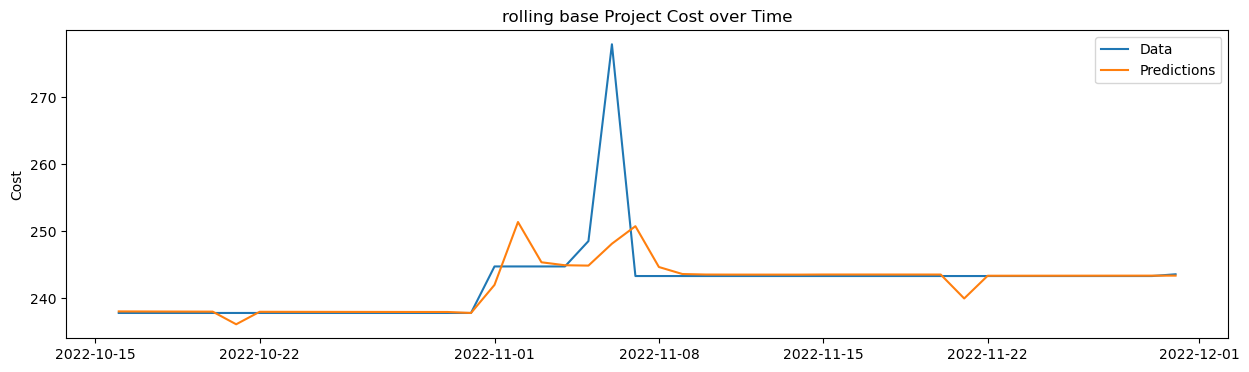

In [37]:
# 建立日期範圍，從 2022/10/16 到 2022/11/30
dates = pd.date_range(start='2022-10-16', end='2022-11-30', freq='D')
dates = pd.to_datetime(dates)
#print(test_data)
# 建立 DataFrame，將預測結果和日期作為列
df = pd.DataFrame({'date': dates, 'cost': prediction})
df['date'] = pd.to_datetime(df['date'])

print(df)

plt.figure(figsize=(15,4))
plt.plot(test_data)
plt.plot(df['date'], df['cost'])

plt.legend(('Data', 'Predictions'))

plt.title('rolling base Project Cost over Time')
plt.ylabel('Cost')


